# Entry Class For Scraping

### Using 9.9 公益 as an example

### Warning: 我可能有很多废话，但是废话里面可能也有要点...怎么办～～～

－陈晓理

# 0 Prelude~~~ (俗称，前戏)

网页爬虫(Scraping)是现代数据采集的重要渠道，爬虫技术应该说也一直伴随互联网的的快速发展而不断演进着。大部分网站也不甘心自己的宝贵数据就这么被爬虫给一个个爬了下来，于是网页技术中的反爬虫技巧也在不断的提高，爬虫与反爬虫这两个对手就在这‘你来我往’中不断提升各自的修行。

我们这一次开一个头，先解决9.9公益日面对的问题，由此稍微展开一小点，让彭小天天朋友以小见大，以后见到其他的类型的时候，不会慌，知道应该往哪个方向寻找解决方案，当然，往 **陈晓理** 老师这边找解决方案肯定是没有问题的！

在讲网页爬虫之前，我们要先讲一下网页web page，我们爬数据都是从网页上爬下来，那网页是怎样的一种格式？我们到底爬的是什么东西？

我们看到的网页都是有浏览器解析后的呈现，浏览器解析的是网页的代码文件。网页代码文件分几种，基本的是 **html, css, javascript**, 其中

1. **html**是大结构
2. **css**是用来格式化这个大结构，让它变得更漂亮更有展现力
3. **javascript**就是更灵活更强大的工具，来执行更丰富的功能


### 用我的话来说，html 搭建的是骨架，肌肉和皮肤


![](./html_body.jpg)

###  css来做丰胸，垫下巴，割双眼皮，美发染发

![李云龙你这个浓眉大眼的也叛变了](https://s2.wxwenku.com/getimg/ae57950330606875df12793a1a6b54eff150d0ce3945ec7ef9cc87a595679216864c63786003cb7d9f1781d2e2d5bce85e5daea53a0d320822bfe2a2bdc03aec6615b3b6a6fce1aaafe5feb9b4f76b5dee40d41f3c086ff59d0c9a0a8ae36176a5cf85c637eca430cf5d1e2ebc049420f2f8c93dfa169c7b6b45487924df34547c59bd3eae536c7ae0bbe13ba0f2d058)

### Javascript就是用一个大的鼓风机把你的人吹得更飘逸，更动感，更迷人～～～

![](http://img.mp.itc.cn/upload/20170620/f3d56124ee9e40a599dc86f67b07c713_th.jpg)


可以了可以了，看个十七八遍就行了。梦想是美好的，现实是骨感的。我们讲网络爬虫呢，主要还是针对html，诶，诶，不要走啊，不要走啊～～～～

你要这样想，我们都是真诚的人，我们都喜欢透过现象看本质，要抓重点，有了重点，才有李云龙，才有新垣结衣，来来来，我们来看看html长成什么样子

# 1 HTML长什么样

![DOM树形结构](DOM树形结构_new.png )

这是一般的结构，看起来如果不习惯的话，没关系，我想一个例子

这里面的层级结构更简单

![乔帮主DOM结构](乔帮主DOM树形图.png)

![乔帮主](http://i0.sinaimg.cn/IT/2011/1215/U5384P2DT20111215041107.png)

比如在这里，我们需要网络爬虫沿着html的层级结构，定位到乔帮主的姓名和生卒年信息，然后copy下来。
但首先，我们需要查看html代码，确定这样的信息能不能爬下来，应该用什么样的方法来爬，然后用人工的方式定位这些信息的位置，然后再用其他工具，将人工定位转为用工具来识别位置的特征，实现定位。

所以，最基本的网络爬虫中，有两个方面是最主要的：

通过查看html网页结构，我们必须了解
1. **数据来源类型**
2. **定位数据位置**


# 2 来看看99公益日结果页面的网页结构

### 这里有若干知识点

1. 首先，如何查看给定网页的html代码？

来来来，这样，以chrome为例，将网址（http://ssl.gongyi.qq.com/m/201799/realtime.html?tp=2&o=1） copy到地址栏，回车，然后在页面上用鼠标右键点击，选择** inspect ** ，chrome就将你带入查看网页代码的界面了

![inspect](./inspect.png)

那么为什么我们会看到页面上出现“为了更好的体验，请是用竖屏浏览”, 这是因为这个网页是专门给手机看的。没事儿，在**inspect**模式中, 选择右上方的“**手机阅览模式 toggle divice toolbar**”自然就去掉这个页面，然后就能够看到最关心的榜单页面了

![手机阅览模式](./手机阅览模式.png)

![榜单页面](./榜单页面.png)

## 2.1 查看html结构，确定数据位置和来源

点击页面右上方的**Elements**一栏，进入HTML代码查看页面，

我们可以清楚的看到HTML的层次结构，点击小三角还能够展开这一项的内容，同时，左边页面将显示该段代码对应的网页位置。

![](99右侧定位左侧new.png)

我们也可以直接用鼠标右键移到左边网页中的位置，右键点击，然后在出现菜单中点击**inspect**，就可以在右侧的代码页面中看到对应的代码，非常方便

![](99inspect.png)

我们关注的有这几个关键信息：
1. 基金会名称
2. 基金会排名
3. 参与捐赠的人数
4. 捐赠总额


在HTML中，我们看到了相应的信息以及他们的位置，那我们试着把这页html拿下来，仔细看看怎么爬。

## 2.2 动手下载并读取网页HTML

我们要用到的是python 的几个经典包，包括 BeautifulSoup, urllib, 或者requests

In [2]:
from bs4 import BeautifulSoup
import urllib.request
import urllib.parse
import requests
# urllib.request
import re
import json
import json2html
import pandas as pd

In [9]:
# 
url = "http://ssl.gongyi.qq.com/m/201799/realtime.html?tp=2&o=1"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')

该网页的 HTML信息就存到了soup这个变量里面，然后我们看一看这些HTML信息是什么

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="腾讯公益" name="description"/>
<meta content="腾讯公益" name="keywords"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="webkit|ie-comp|ie-stand" name="renderer"/>
<!-- 避免转码 -->
<meta content="no-siteapp" http-equiv="Cache-Control"/>
<meta content="width=device-width,initial-scale=1,user-scalable=0" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="腾讯公益" name="apple-mobile-web-app-title"/>
<title>腾讯公益 - 实时战报</title>
<script type="text/javascript">
            (function() {
                var baseFontSize = 100;
                var baseWidth = 375;
                var clientWidth = document.documentElement.clientWidth || window.innerWidth;
                var innerWidth = Math.max(Math.min(clientWidth, 480), 360);

                var rem = 100;
                if (innerWidth >= 414) {
                    rem = Math.floor(innerWidth / baseWidth * baseFontSi
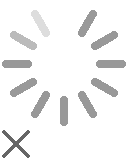
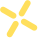
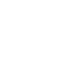
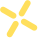
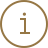
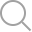
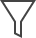
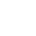

In [11]:
soup #可以用 ctrl+F 来搜索关键词"携手“ 然后就可以看到相应的HTML代码

令人奇怪的是，这里我们没有看到任何数字，没有携手多少人的具体数字，也没有具体筹款额的数字，甚至连基金会的名称也没有，这是怎么回事？

这里的显示结果表明：我们在页面看到的“携手”和“筹款额”，并不是静止的数字，而应该是从数据库里面提取出来的结果，我们现在拿下来的HTML代码，在相应的位置上，显示的是在从数据库里面提取具体数字结果的地址和变量。

这就引出了网页的另外几个知识点

## 2.3 静态网页和动态网页

静态网页和动态网页的区别有几个，一般说来最主要区别是：
1. 如果所有页面都是保存在服务器上面的文件，那么就是静态的，如果要根据用户的行为来返回一个网页的，那么就是动态的。
2. 如果跟后台数据库有交流，那很可能是动态的。

我们看到的这个腾讯的公益日排行的页面，虽然是html结尾，但是他的